# Gradient descent

## Simulate

- $X\sim U(0,1)$
- $y = 2 + 9X + \epsilon$
- $\epsilon \sim N(0,1)$



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

np.random.seed(42)
samples = 1000

X = 2*np.random.rand(samples, 1) # random samples from uniform distribution
epsilon = np.random.normal(0, 1, size=(samples,1)) # adding noise
epsilon.shape, X.shape

((1000, 1), (1000, 1))

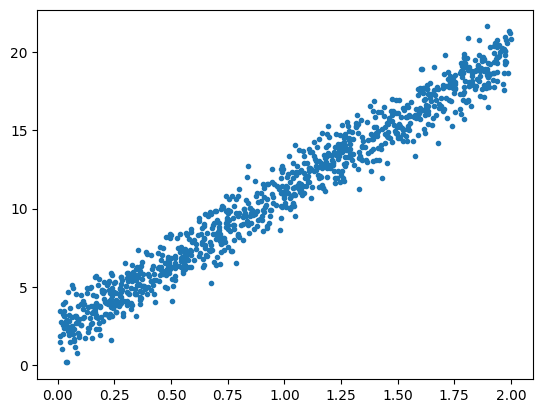

In [9]:
y = 2 + 9*X + epsilon
plt.plot(X,y, ".")

In [10]:
X = np.c_[np.ones(samples), X] # concatenating

In [12]:
X[:5], X.shape

(array([[1.        , 0.74908024],
        [1.        , 1.90142861],
        [1.        , 1.46398788],
        [1.        , 1.19731697],
        [1.        , 0.31203728]]),
 (1000, 2))

## Train|test split

In [15]:
from sklearn.model_selection import train_test_split

# help(train_test_split) # to get the right order for output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((670, 2), (330, 2), (670, 1), (330, 1))

## Batch gradient descent

In [45]:
np.random.seed(42)

def gradient_descent(X, y, learning_rate = .1, epochs = 100):
    m = len(X)

    # (beta_0, beta_1)^T
    # random starting values for theta from standard normal distribution dim (2,1)
    theta = np.random.randn(X.shape[1],1) 

    for _ in range(epochs):
        gradient = 2/m * X.T @ (X @ theta - y)
        theta -= learning_rate*gradient # learning_rrate is eta in theory
    return theta

theta = gradient_descent(X_train, y_train, epochs = 10000)
theta.reshape(-1) # throws away additional dimension (2,1) -> (2,)

array([2.20500716, 8.90206121])

In [47]:
steps = range(1,200,1) # 200 steps, 1 step between each
thetas = np.array(
    [gradient_descent(X_train, y_train, epochs = epoch).reshape(-1) for epoch in steps]
    )

thetas.shape

(199, 2)

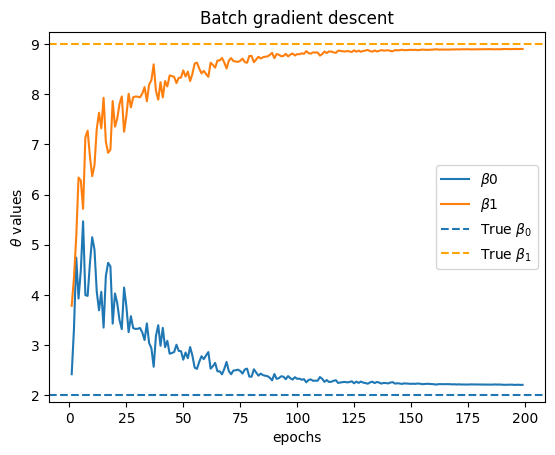

In [59]:
fig,ax = plt.figure(), plt.axes()
ax.plot(steps, thetas, label = [r"$\beta 0$", r"$\beta 1$"])
ax.axhline(y = 2, linestyle="--", label = r"True $\beta_0$")
ax.axhline(y = 9, color = "orange", linestyle="--", label = r"True $\beta_1$")
ax.set(xlabel = "epochs", ylabel = r"$\theta$ values", title = "Batch gradient descent")
ax.legend()

## Stochastic gradient descent (SGD)

- Geron (2019)

In [87]:
epochs = 10
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_rate_schedule(t):
    """Decays the learning rate as training progresses"""
    return t0/(t+t1)

theta = np.random.randn(2,1)
m = len(X_train)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]

        gradient = 2*x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_rate_schedule(epoch*m+i) # why epoch*m + i?
        theta -= eta*gradient

theta

array([[2.21492823],
       [8.82892556]])

In [88]:
y_pred = X_test@theta

MAE = np.mean(np.abs(y_test - y_pred))
MSE = np.mean((y_test - y_pred)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(0.7745378641006649, 0.9543133664411371, 0.9768896388237195)